In [2]:
! pip install --upgrade matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [4]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

# QUESTION

<font color='white'>-->How are a student's chances of being admitted into a university impacted by their test scores versus the letter of recommendation and cumulative GPA?</font>

# DATA COLLECTION

<font color='white'>-->Used 'https://www.kaggle.com/datasets/akshaydattatraykhare/data-for-admission-in-the-university' to download csv file: 'adm_data.csv'</font>

# DATA CLEANING

In [5]:
adm_df = pd.read_csv(r'adm_data.csv')

In [6]:
adm_df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [7]:
adm_df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
adm_df = adm_df.rename(columns = {'LOR ':'LOR', 'Chance of Admit ':'Chance of Admit'})

In [9]:
new_adm = adm_df[['GRE Score', 'TOEFL Score', 'LOR', 'CGPA', 'Chance of Admit']]
new_adm

,GRE Score,TOEFL Score,LOR,CGPA,Chance of Admit
0,337,118,4.5,9.65,0.92
1,324,107,4.5,8.87,0.76
2,316,104,3.5,8.00,0.72
3,322,110,2.5,8.67,0.80
4,314,103,3.0,8.21,0.65
...,...,...,...,...,...
395,324,110,3.5,9.04,0.82
396,325,107,3.5,9.11,0.84
397,330,116,4.5,9.45,0.91
398,312,103,4.0,8.78,0.67


<font color='white'>-->In the previous two code cells, I renamed some of the columns in the original datafram so that the extra spaces would not be a conflict when creating duplicates or new dataframes using that data.</font>

# DATA VISUALIZATION

In [10]:
new_adm.describe()

,GRE Score,TOEFL Score,LOR,CGPA,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.452500,8.598925,0.724350
std,11.473646,6.069514,0.898478,0.596317,0.142609
min,290.000000,92.000000,1.000000,6.800000,0.340000
25%,308.000000,103.000000,3.000000,8.170000,0.640000
50%,317.000000,107.000000,3.500000,8.610000,0.730000
75%,325.000000,112.000000,4.000000,9.062500,0.830000
max,340.000000,120.000000,5.000000,9.920000,0.970000


<AxesSubplot: >

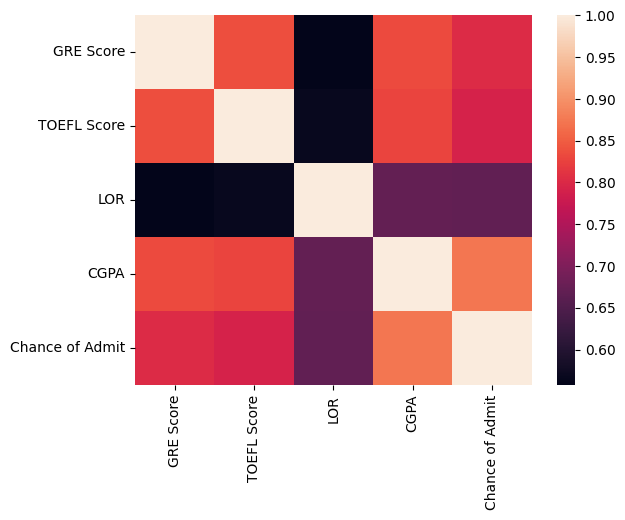

In [11]:
sns.heatmap(new_adm.corr())

<font color='white'>-->The above heatmap is just for fun, wanted to see what it would look like with a simplified dataset. As can be observed in this heatmap, Cumulative GPA has the stronest correlation with Chance of Admittance into a university, which basically answers my main question. I am basically trying to prove this heatmap true with the rest of my project.</font>

In [12]:
new_adm.head()

,GRE Score,TOEFL Score,LOR,CGPA,Chance of Admit
0,337,118,4.5,9.65,0.92
1,324,107,4.5,8.87,0.76
2,316,104,3.5,8.00,0.72
3,322,110,2.5,8.67,0.80
4,314,103,3.0,8.21,0.65


Text(0, 0.5, 'TOEFL')

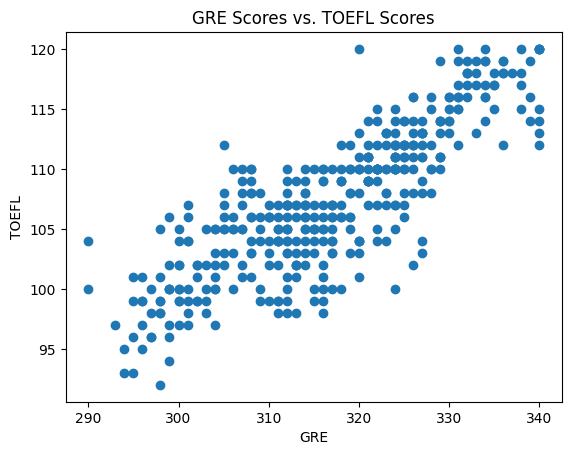

In [13]:
plt.scatter(new_adm['GRE Score'], new_adm['TOEFL Score'])

plt.title("GRE Scores vs. TOEFL Scores")
plt.xlabel("GRE")
plt.ylabel("TOEFL")

<font color='white'>-->This simple scatterplot shows the correlation between GRE and TOEFL test scores, which is a pretty strong, positive correlation - as expected.</font>

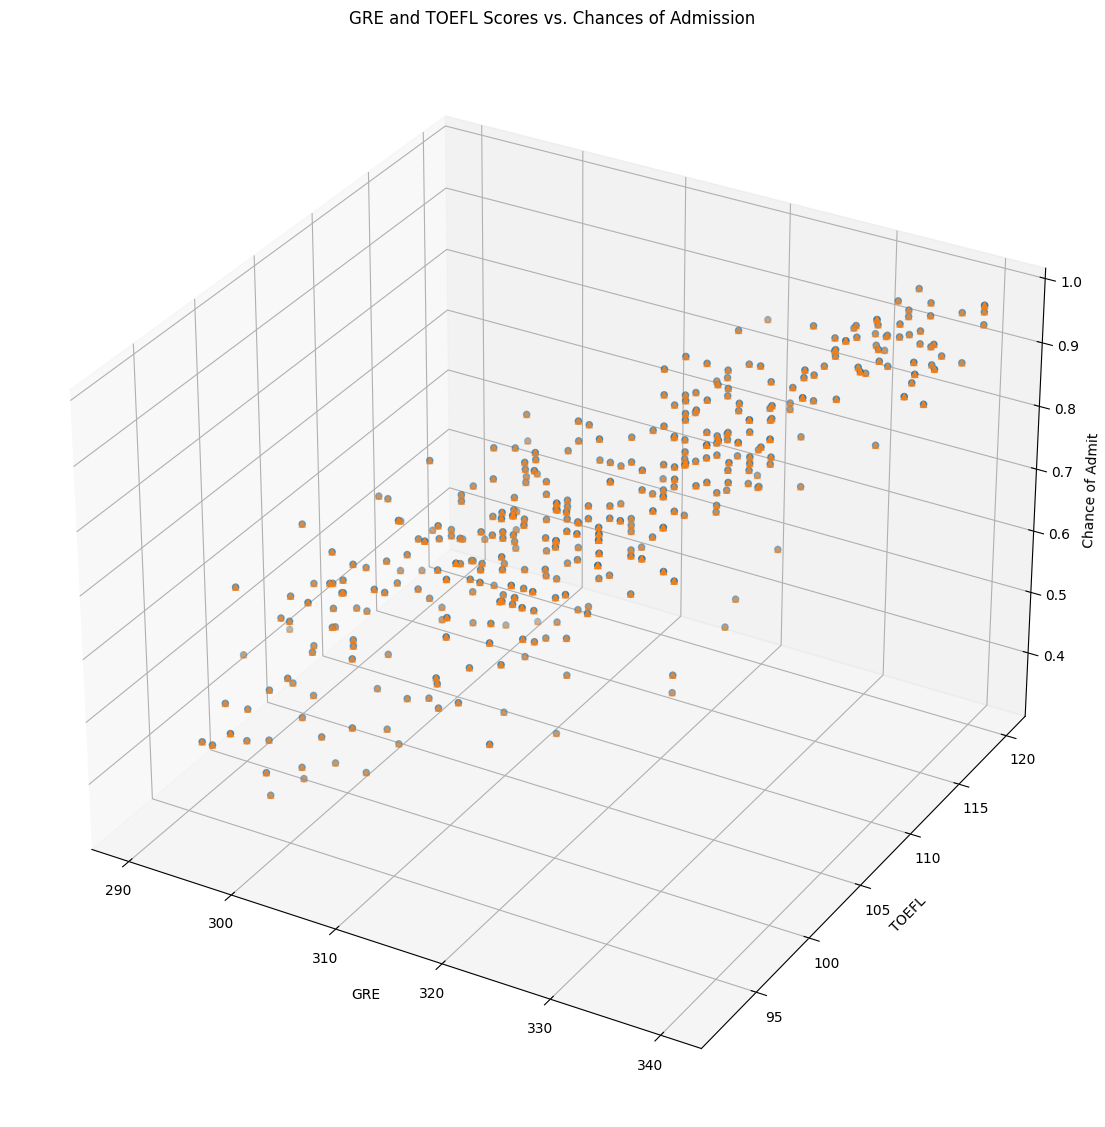

In [14]:
np.random.seed(19680801)

def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure(figsize=(14,15))
ax = fig.add_subplot(projection='3d')

n = 1000

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = new_adm['GRE Score']
    ys = new_adm['TOEFL Score']
    zs = new_adm['Chance of Admit']
    ax.scatter(xs, ys, zs, marker=m)


plt.title("GRE and TOEFL Scores vs. Chances of Admission")

ax.set_xlabel('GRE')
ax.set_ylabel('TOEFL')
ax.set_zlabel('Chance of Admit')

plt.show()

# plt.scatter(new_adm['GRE Score'], new_adm['TOEFL Score'], new_adm['Chance of Admit'])

<font color='white'>-->This 3D Scatterplot shows the correlation between three variables: the two test scores and the chances of being admitted into a university. It is clear that as GRE and TOEFL test scores increase, the chances of admittance also improve.</font>

Text(0, 0.5, 'CGPA')

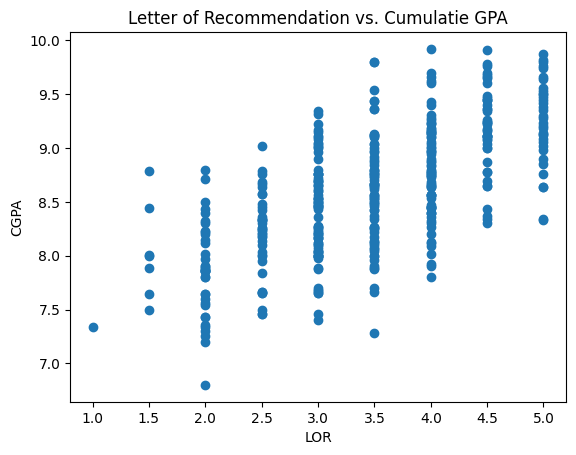

In [15]:
plt.scatter(new_adm['LOR'], new_adm['CGPA'])

plt.title("Letter of Recommendation vs. Cumulatie GPA")
plt.xlabel("LOR")
plt.ylabel("CGPA")

<font color='white'>-->This simple scatterplot shows the correlation between Letter of Recommendation Ratings and the Cumulative GPA, which is a pretty strong, positive correlation - as expected.</font>

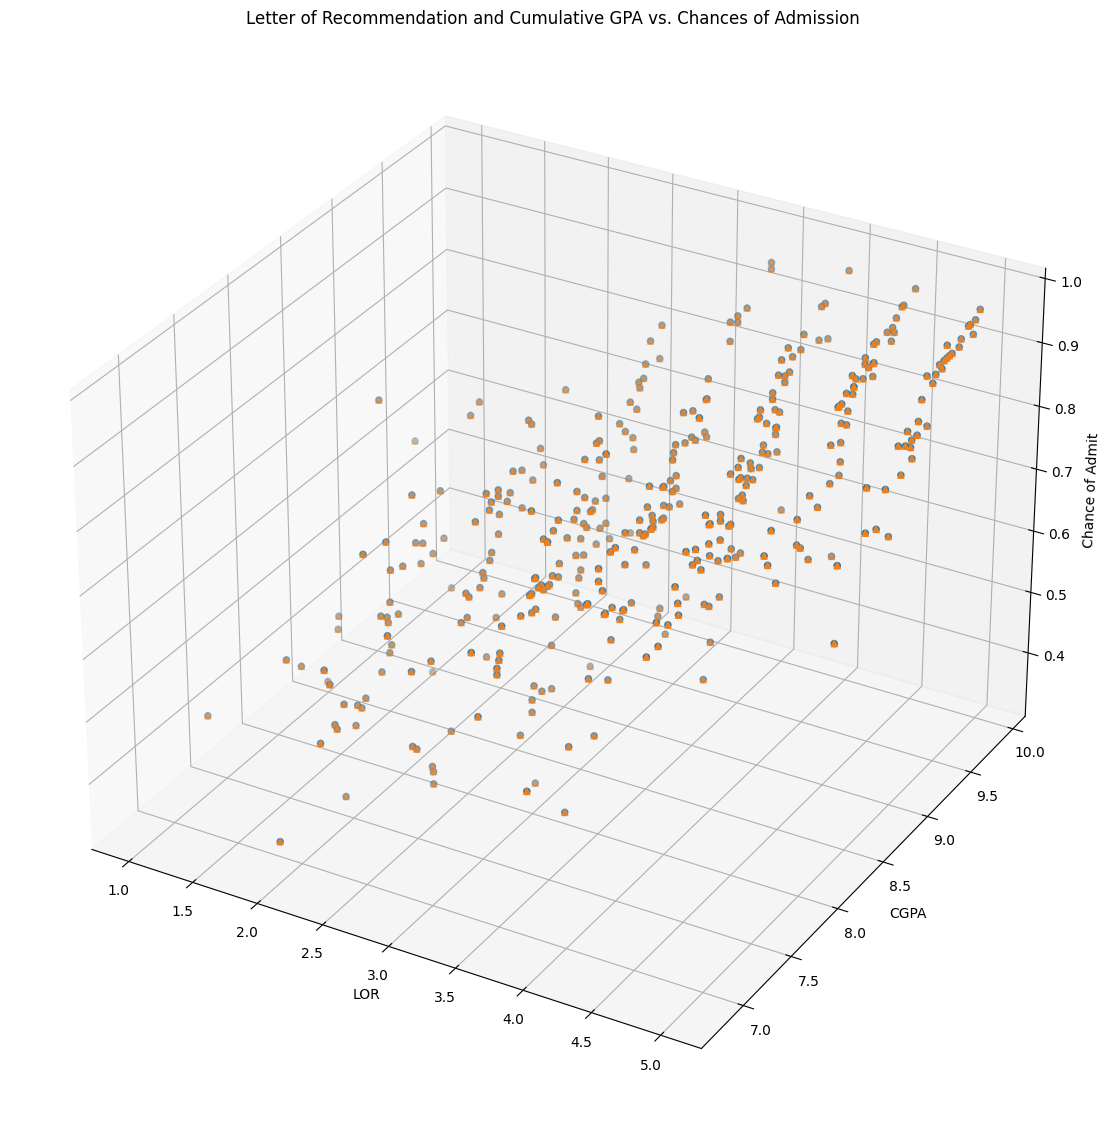

In [16]:
np.random.seed(19680801)

def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure(figsize=(14,15))
ax = fig.add_subplot(projection='3d')

n = 1000

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = new_adm['LOR']
    ys = new_adm['CGPA']
    zs = new_adm['Chance of Admit']
    ax.scatter(xs, ys, zs, marker=m)
    
plt.title("Letter of Recommendation and Cumulative GPA vs. Chances of Admission")

ax.set_xlabel('LOR')
ax.set_ylabel('CGPA')
ax.set_zlabel('Chance of Admit')

plt.show()

# plt.scatter(new_adm['GRE Score'], new_adm['TOEFL Score'], new_adm['Chance of Admit'])

<font color='white'>-->This 3D Scatterplot shows the correlation between three variables: the Letter of Recommendation rating, the Cumulative GPA, and the chances of being admitted into a university. It is clear that as LOR ratings and CGPA increase, the chances of admittance also improve.</font>

In [17]:
df_float = new_adm.select_dtypes('float').copy()

In [18]:
df_float.shape
df_float.head()

,LOR,CGPA,Chance of Admit
0,4.5,9.65,0.92
1,4.5,8.87,0.76
2,3.5,8.00,0.72
3,2.5,8.67,0.80
4,3.0,8.21,0.65


<font color='white'>-->The above two cells were me learning how to filter columns with just float data types as values.</font>

In [19]:
new_adm.head()

,GRE Score,TOEFL Score,LOR,CGPA,Chance of Admit
0,337,118,4.5,9.65,0.92
1,324,107,4.5,8.87,0.76
2,316,104,3.5,8.00,0.72
3,322,110,2.5,8.67,0.80
4,314,103,3.0,8.21,0.65


In [20]:
chance_admit = new_adm['Chance of Admit'].copy()

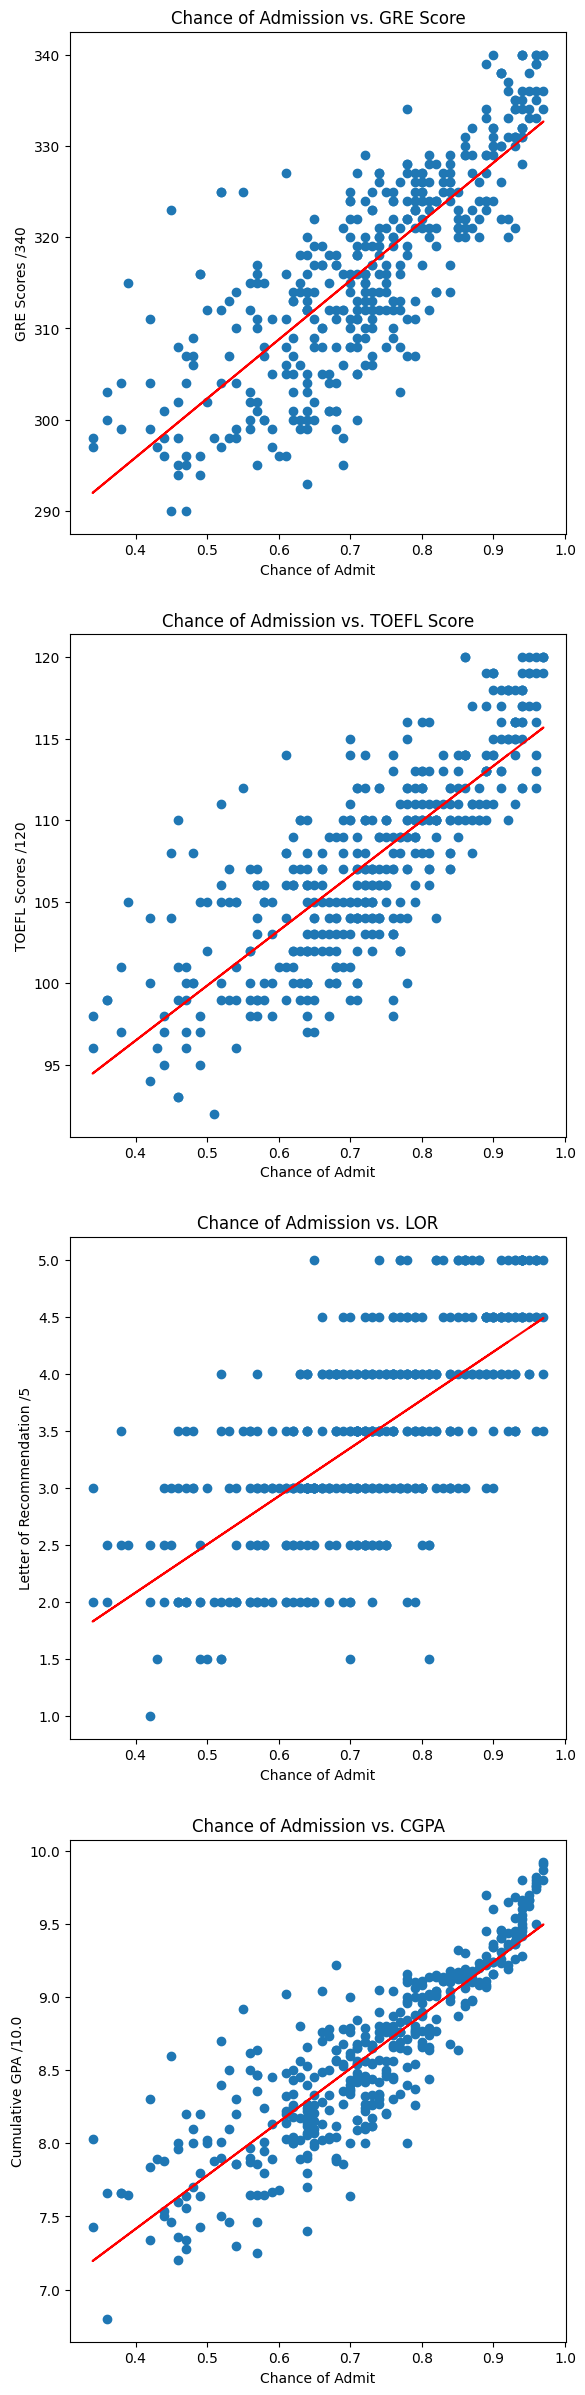

In [22]:
figure, axis = plt.subplots(4)
figure.set_figheight(30)
cols = new_adm.columns.tolist()
cols_ref = ['GRE Scores /340', 'TOEFL Scores /120', 'Letter of Recommendation /5', 'Cumulative GPA /10.0']
for i in range(0, 4):
    axis[i].scatter(chance_admit, new_adm[cols[i]])
    axis[i].set_title(f"Chance of Admission vs. {cols[i]}")
    m, b = np.polyfit(chance_admit, new_adm[cols[i]], 1)
    axis[i].set_xlabel('Chance of Admit')
    axis[i].set_ylabel(cols_ref[i])
    axis[i].plot(chance_admit, m*chance_admit + b, color='red')

<font color='white'>-->The above four scatterplots show the correlation between Chance of Admittance and each of the four variables: GRE score, TOEFL score, LOR rating, and CGPA. The line of best fit is shown as the linear, red line. While this data is sufficient for answering part of my question, it doesn't provide statistical proof. It only shows that LOR rating is the weakest correlation, yet still a positive one.</font>

In [23]:
gre = new_adm["GRE Score"].mean()
toefl = new_adm["TOEFL Score"].mean()
lor = new_adm["LOR"].mean()
cgpa = new_adm["CGPA"].mean()
adm_chance = new_adm["Chance of Admit"].mean()

print([gre, toefl, lor, cgpa, adm_chance])

[316.8075, 107.41, 3.4525, 8.598925, 0.72435]


<font color='white'>-->I calculated the averages of my 5 important columns so that I could plot them on a pie chart and a bar graph later.</font>

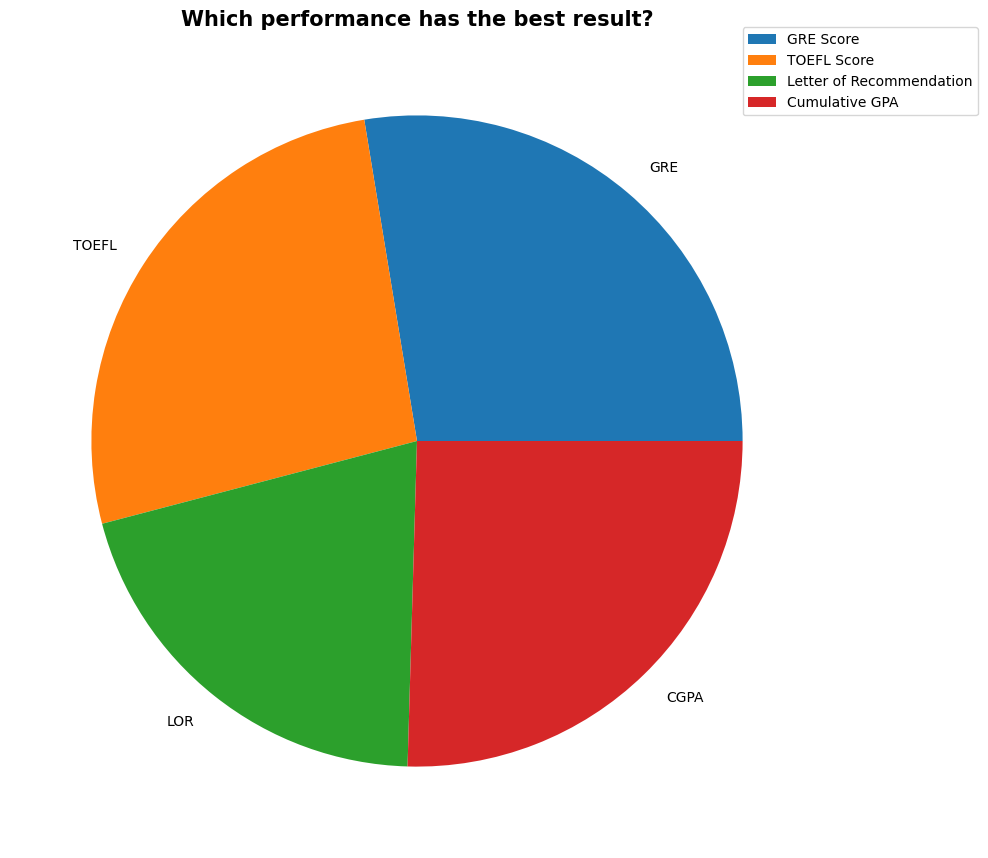

In [25]:
y = np.array([gre, toefl*2.833, lor*68, cgpa*34])
labels = ['GRE', 'TOEFL', 'LOR', 'CGPA']

fig = plt.gcf()
fig.set_size_inches(10,10)
plt.pie(y, labels=labels)
plt.title('Which performance has the best result?', fontweight='bold', fontsize=15)

legend=['GRE Score', 'TOEFL Score', 'Letter of Recommendation', 'Cumulative GPA']

plt.legend(legend, loc = (0.9, 0.9))

plt.tight_layout()

# plt.pie(y)
plt.show()

<font color='white'>-->For the above pie chart, I did some scaling with the numbers. Basically, since a pie chart compares proportions, I scaled up the TOEFL, LOR, and CGPA values by multiplying the following numbers with each respective variable: 340 divided the max value for that data (so 340/120=2.833 for TOEFL, 340/5=68 for LOR rating, and 340/10=34 for CGPA). I also learned how to add a legend and in addition to labels for this pie chart.</font>

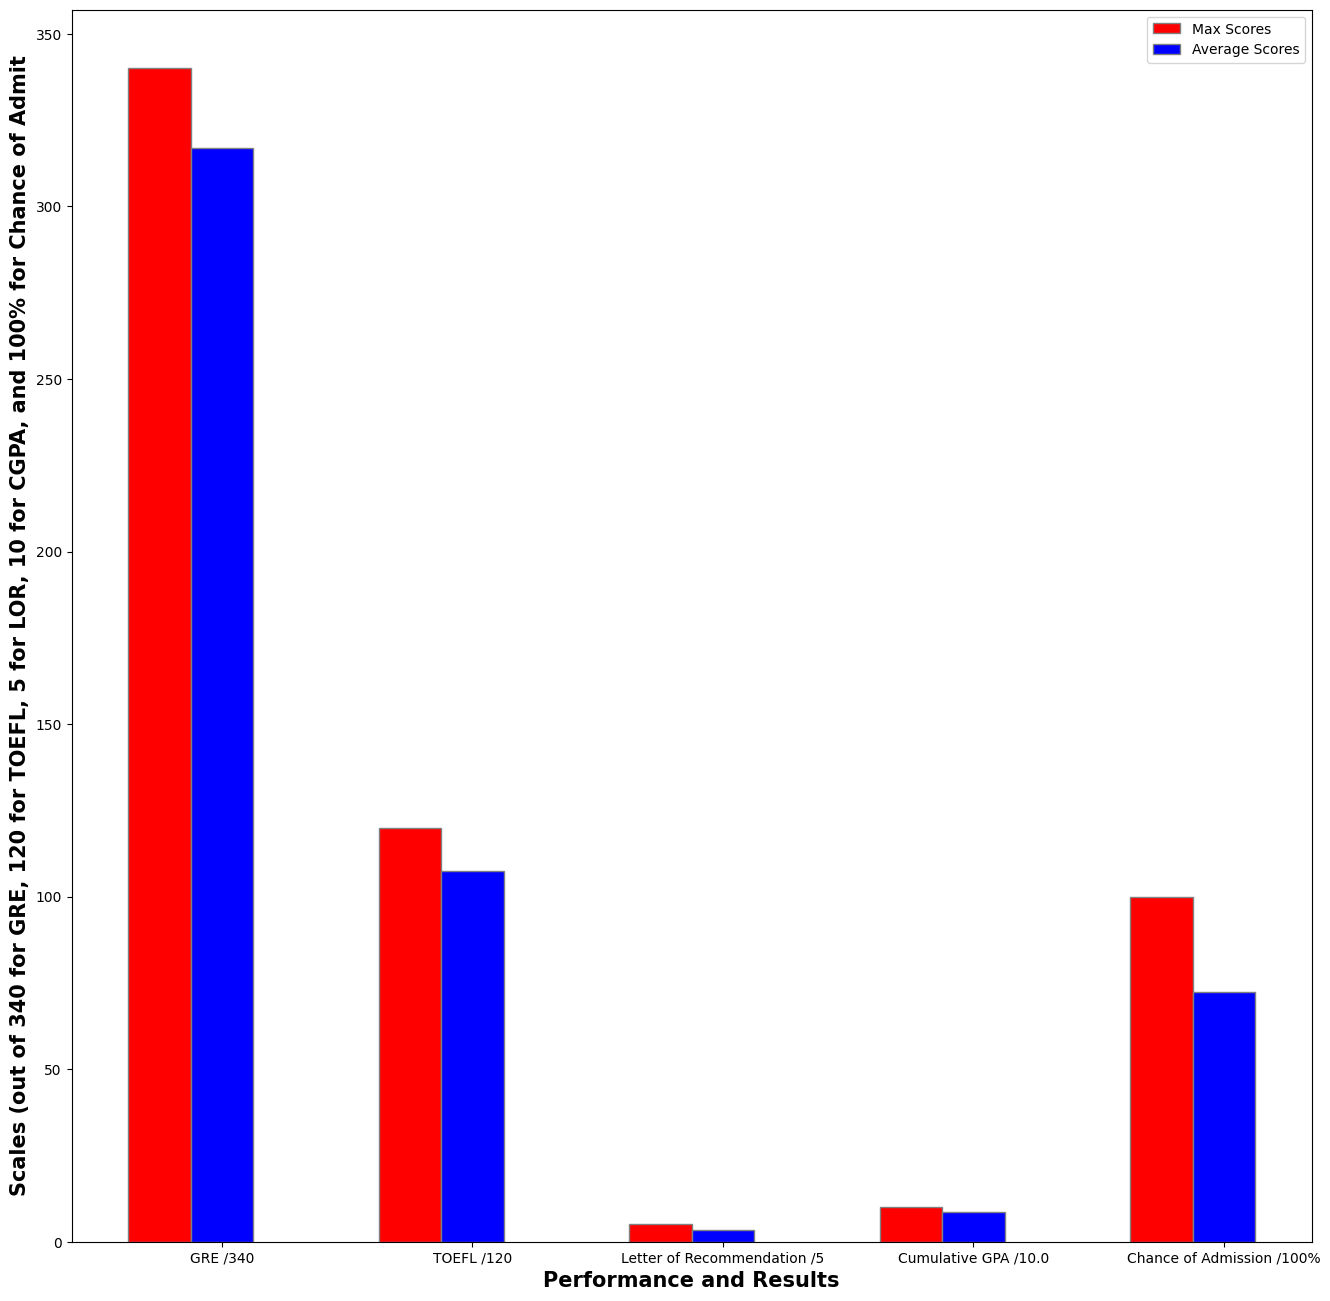

In [26]:
barWidth = 0.25
fig = plt.subplots(figsize=(16,16))

max = [340, 120, 5, 10, 100]
averages = [gre, toefl, lor, cgpa, adm_chance*100]

br1 = np.arange(len(max))
br2 = [x + barWidth for x in br1]

plt.bar(br1, max, color='r', width=barWidth, edgecolor='grey', label='Max Scores')
plt.bar(br2, averages, color='b', width=barWidth, edgecolor='grey', label='Average Scores')

plt.xlabel('Performance and Results', fontweight='bold', fontsize=15)
plt.ylabel('Scales (out of 340 for GRE, 120 for TOEFL, 5 for LOR, 10 for CGPA, and 100% for Chance of Admit', fontweight='bold', fontsize=15)

plt.xticks([r + barWidth for r in range(len(max))], 
           ['GRE /340', 'TOEFL /120', 'Letter of Recommendation /5', 'Cumulative GPA /10.0', 'Chance of Admission /100%'])

plt.legend()
plt.show()

<font color='white'>-->I created this bar graph to demonstrate how each variables' average value compares to its maximum attainable value. For example, the average for LOR rating was approximately 3.45 out of 5, which can be seen by its bar graph.</font>

# DATA MODELING

In [27]:
df_preprocess = adm_df.copy()
df_preprocess['Chance of Admit'] = df_preprocess['Chance of Admit'].apply(lambda x: x*100)
df_preprocess.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,92.0
1,2,324,107,4,4.0,4.5,8.87,1,76.0
2,3,316,104,3,3.0,3.5,8.00,1,72.0
3,4,322,110,3,3.5,2.5,8.67,1,80.0
4,5,314,103,2,2.0,3.0,8.21,0,65.0


<font color='white'>-->In line two of the above cell, I changed the value of the 'Chance of Admit' column to be a percentage instead of a decimal form of the ratio by multiplying all of the values in that column by 100.</font>

In [28]:
pd.set_option('display.max_columns', None)

In [29]:
df_preprocess.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,92.0
1,2,324,107,4,4.0,4.5,8.87,1,76.0
2,3,316,104,3,3.0,3.5,8.00,1,72.0
3,4,322,110,3,3.5,2.5,8.67,1,80.0
4,5,314,103,2,2.0,3.0,8.21,0,65.0


In [30]:
df_preprocess_sub = df_preprocess.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8]]

<font color='white'>-->In this cell, I selected all but the first column (which means I'm excluding the Serial No. since that isn't really important). I learned how to use the iloc() function and basically understood its functionality, which was good.</font>

In [31]:
df_preprocess_sub.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,92.0
1,324,107,4,4.0,4.5,8.87,1,76.0
2,316,104,3,3.0,3.5,8.00,1,72.0
3,322,110,3,3.5,2.5,8.67,1,80.0
4,314,103,2,2.0,3.0,8.21,0,65.0


In [32]:
X = df_preprocess_sub.iloc[:, list(range(0, df_preprocess_sub.shape[1]-1))]
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


<font color='white'>-->I used the iloc() function again but this time for the last column, I wanted to exclude the Chance of Admit column since that is what I am going to use as my y value.</font>

In [33]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [34]:
y = df_preprocess_sub['Chance of Admit']
y

0      92.0
1      76.0
2      72.0
3      80.0
4      65.0
       ... 
395    82.0
396    84.0
397    91.0
398    67.0
399    95.0
Name: Chance of Admit, Length: 400, dtype: float64

<font color='white'>-->This is where I established that the 'Chance of Admit' column is my y for which I am training this model to predict.</font>

In [35]:
cols = X.columns.tolist()
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_stand = pd.DataFrame(scaler.fit_transform(X[cols]), columns=cols)

In [37]:
X_stand.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818,0.909112
1,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151,0.909112
2,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631,0.909112
3,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339,0.909112
4,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029,-1.099975


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X.iloc[:, 0:7], y)
y_pred = model.predict(X.iloc[:, 0:7])
print("Mean Squared Error:", mean_squared_error(y, y_pred))

Mean Squared Error: 39.86893243246914


<font color='white'>-->I used Linear Regression modeling for developing the graph below. This cell calculates the Mean Squared Error for me, which is used for finding the average of the squares of the error. It uses all 7 of my columns of data and helps to predict the Chance of Admittance as a linear regression model.</font>

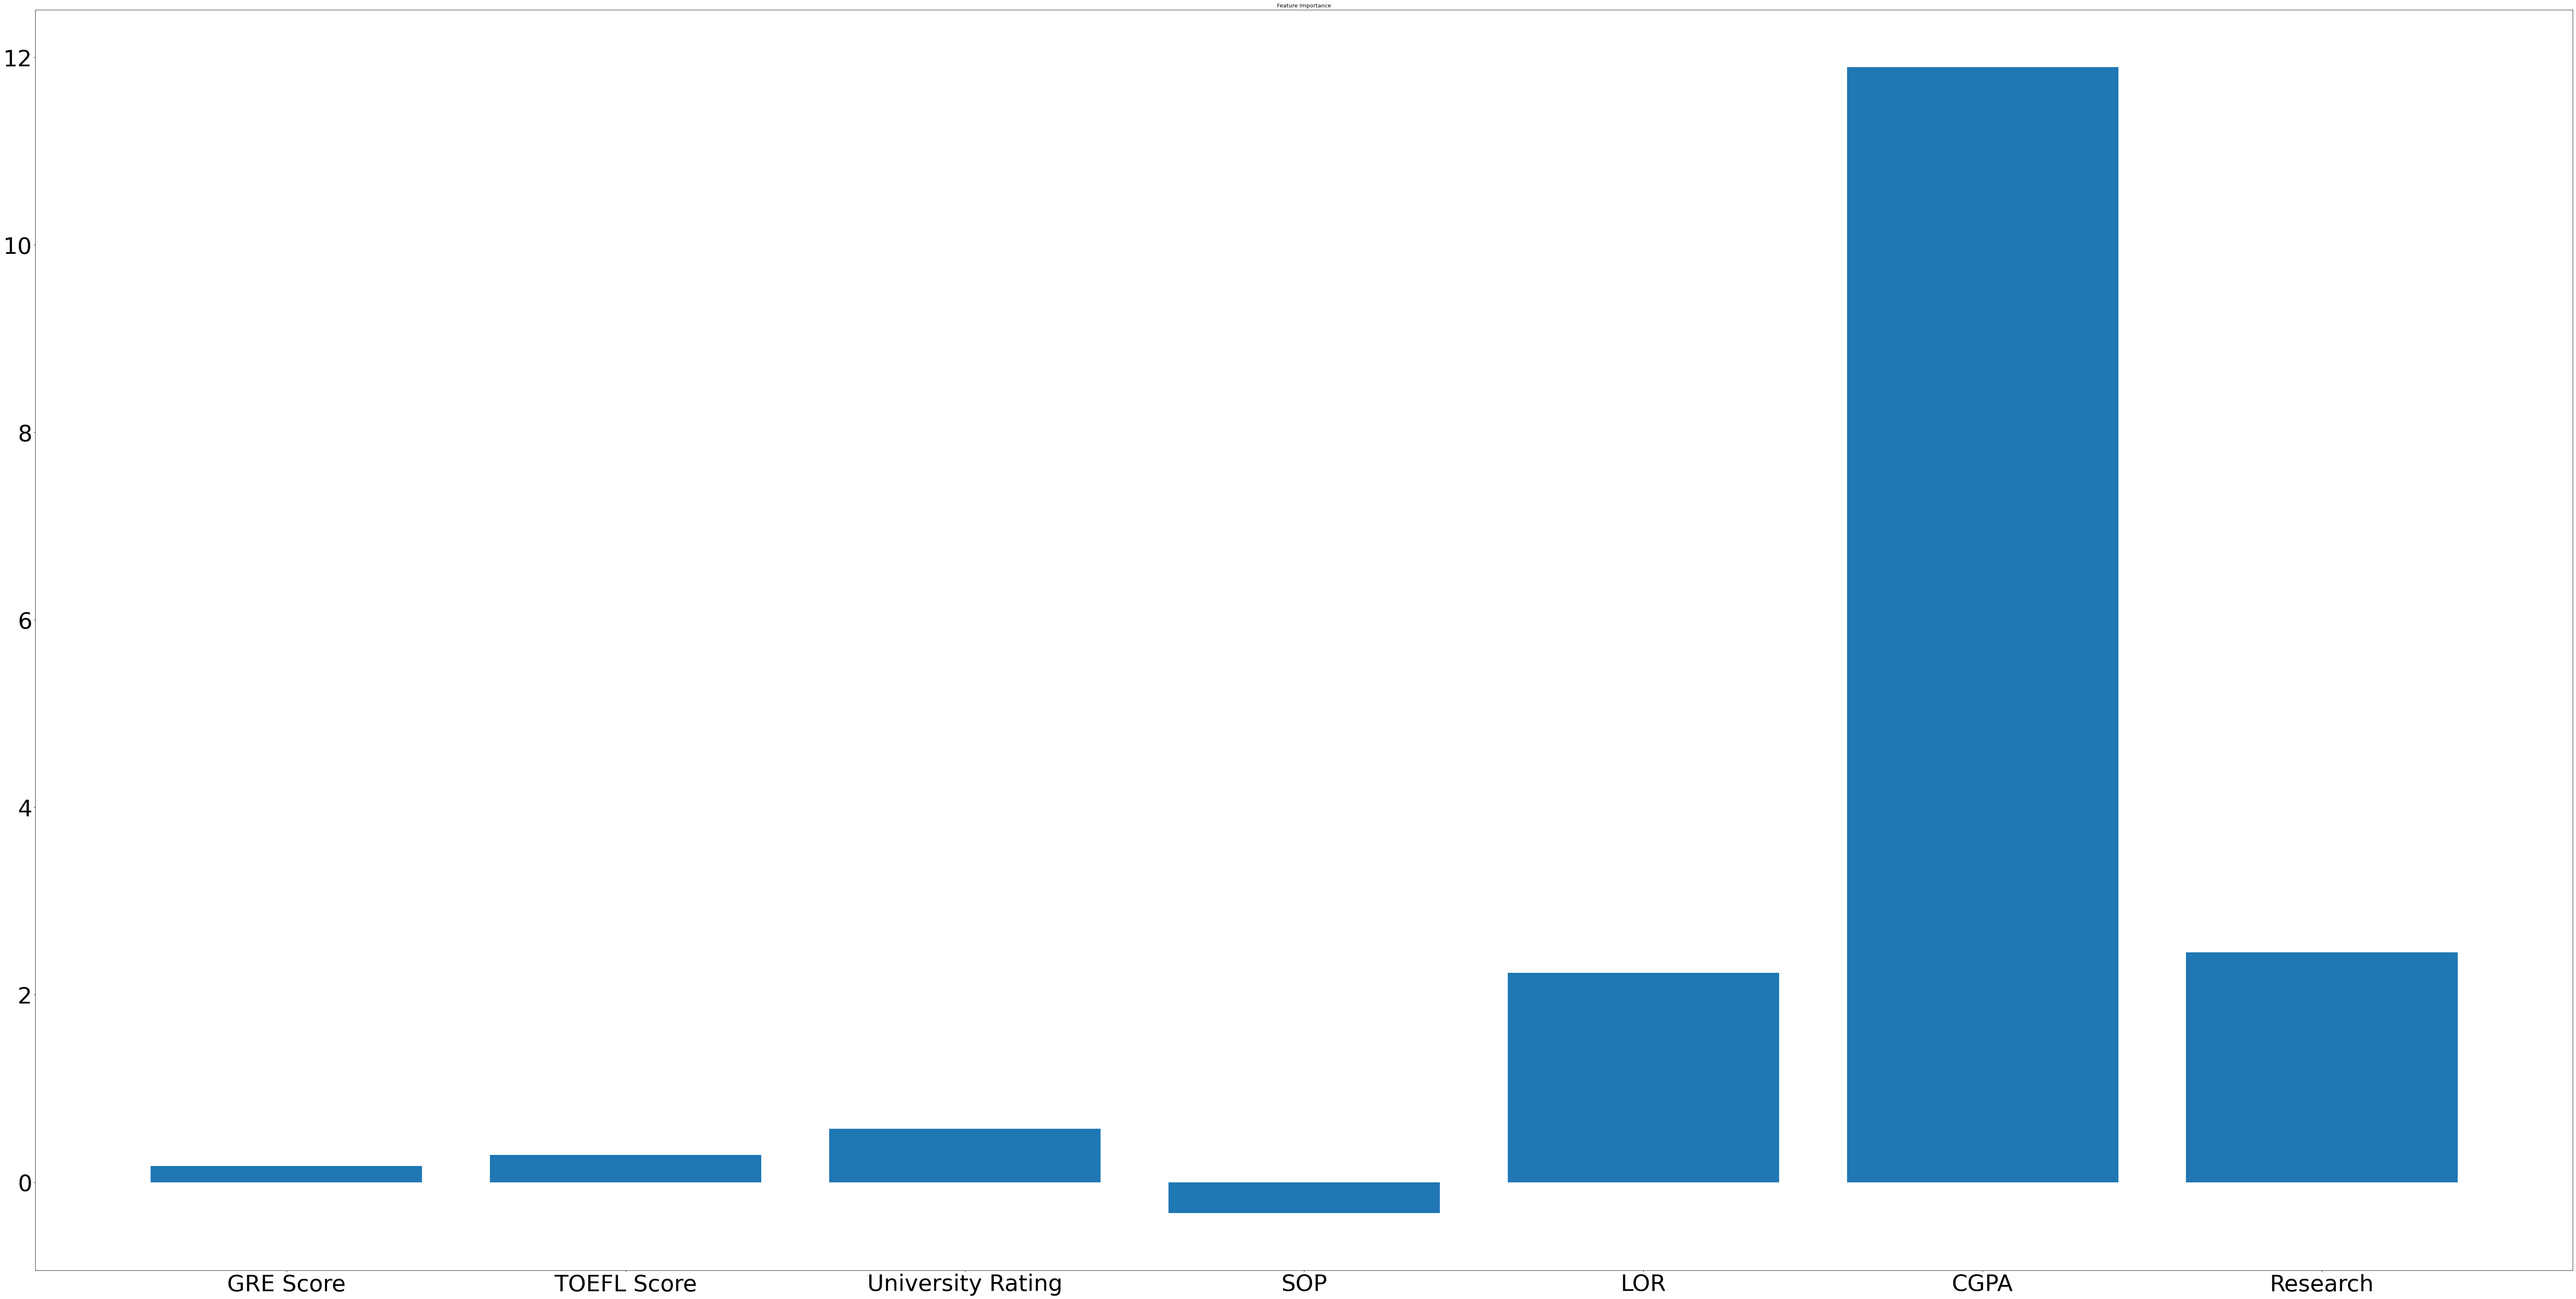

In [39]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(100, 50), dpi=80)
feature_importance = model.coef_
feature_names = X.iloc[:, 0:7].columns

plt.bar(feature_names, feature_importance)
plt.tick_params(axis='both', which='major', labelsize=50)
plt.title("Feature Importance")
plt.show()

<font color='white'>-->This graph simply graphs the 'feature importance' of each variable with a Linear Regression Model. Basically, it highlights which variable is more important for the data modeling. The higher the score, the most important that feature is - which in this case is the CGPA.</font>

In [40]:
temp = {"feature":cols, "feature_importance":feature_importance.ravel()}
pd.DataFrame(temp)

,feature,feature_importance
0,GRE Score,0.173741
1,TOEFL Score,0.291958
2,University Rating,0.571666
3,SOP,-0.330517
4,LOR,2.235313
5,CGPA,11.893945
6,Research,2.452511


In [41]:
# from sklearn import svm
# regr = svm.SVR(kernel='linear')
# regr.fit(X.iloc[:, 0:16], y)
# y_pred = regr.predict(X.iloc[:, 0:16])

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X.iloc[:, 0:7], y)
y_pred = regressor.predict(X.iloc[:, 0:7])

<font color='white'>-->I used Decision Tree Regression modeling for developing the graph below. It uses all 7 of my columns of data and helps to predict the Chance of Admittance as a decision tree regressor model.</font>

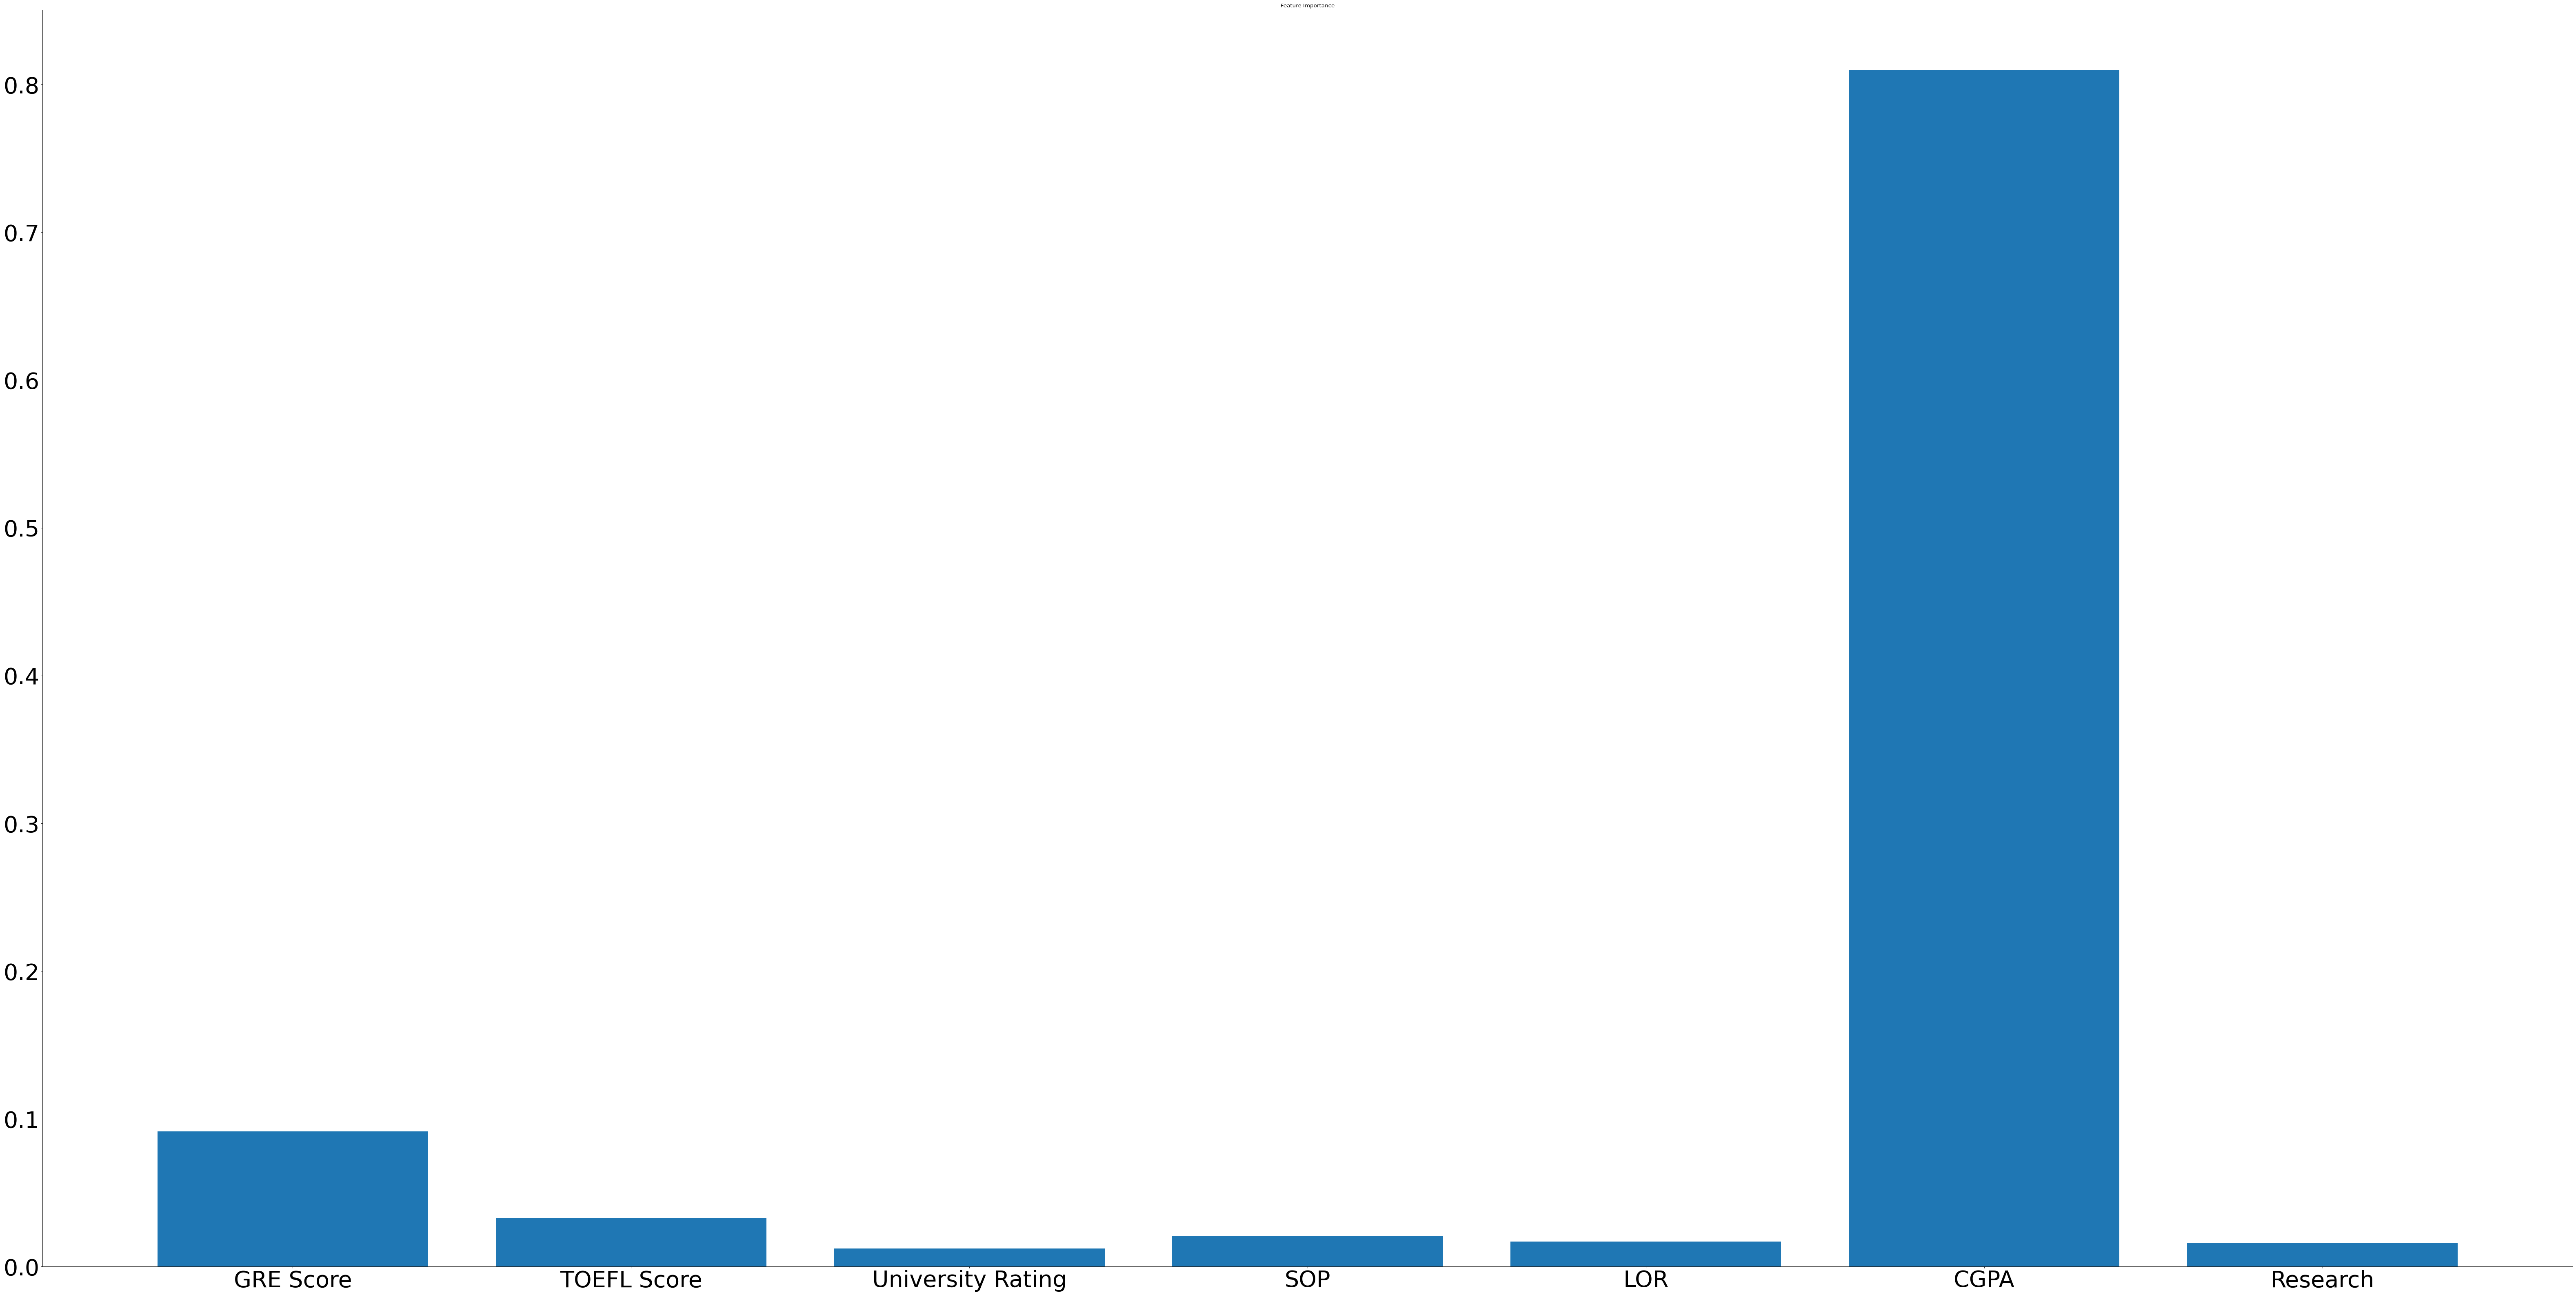

In [42]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(100, 50), dpi=80)
feature_importance_dt = regressor.feature_importances_
feature_names = X.iloc[:, 0:7].columns

plt.bar(feature_names, feature_importance_dt.ravel())
plt.tick_params(axis='both', which='major', labelsize=50)
plt.title("Feature Importance")
plt.show()

In [43]:
temp = {"feature":cols, "feature_importance":feature_importance_dt.ravel()}
pd.DataFrame(temp)

,feature,feature_importance
0,GRE Score,0.091410
1,TOEFL Score,0.032517
2,University Rating,0.012136
3,SOP,0.020895
4,LOR,0.016988
5,CGPA,0.810039
6,Research,0.016014


<font color='white'>-->This graph simply graphs the 'feature importance' of each variable, but this time with a Decision Tree Regressor Model. Basically, it highlights which variable is more important for the data modeling. The higher the score, the most important that feature is - which in this case also is the CGPA.</font>

# CONCLUSION

<font color='white'> -->From both of my machine learning models, it can be seen that CGPA is the most important feature when it comes to predicting the Chances of Admittance into a university. A better Cumulative GPA (out of 10.0) will more likely result in higher chances of being admitted into a university compared to any of the other variables.</font>